### ML Presentation on Model building - Seoul Bike Rental

#### IMPORT LIBRARIES

In [113]:
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'Pandas' 
import pandas as pd 

# display all columns of the dataframe
pd.options.display.max_columns = None

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from mpl_toolkits import mplot3d
import plotly.express as px


from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Exploratory Data Analysis

The dataset contains information about the number of bicycles rented every hour starting from *1st of Dec., 2017* to *30th of Nov., 2018*.

The data contains 8760 rows / observations of  **Number of Bikes** rented and of various **features (13)** that could have affected the *numbers*.  

**Number of Bikes**: Discrete Numerical data; Count of bikes rented at each hour.<br>
**Date**: Nominal data; essentially listing out the dates across which data was collected. <br>
**Hour**: Nominal Data; Hour of the day at which the data was collected.<br>
**Temperature(C)**: Continuous Numerical data; Temperature during the Hour.<br>
**Humidity(%)**: Discrete Numerical data; Humidity during the Hour.<br>
**Wind speed (m/s)**: Continuous Numerical data; Wind Speed during the Hour.<br>
**Visibility (m)**: Discrete Numerical data; Visibility during the Hour.<br>
**Dew point temperature(C)**: Continuous Numerical data; the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity (RH) of 100%.<br>
**Solar Radiation (MJ/m2)**: Continuous Numerical data in Megajoules (MJ) per square meter; average amount of sunlight hitting a horizontal surface during an hour.<br>
**Rainfall(mm)**: Continuous Numerical data.<br>
**Snowfall (cm)**: Continuous Numerical data.<br>
**Seasons**: Nominal Data; Namely Autumn, Spring, Summer and Winter<br>
**Holiday**: Nominal (Binary) Data; classifying a given day to be a Holiday or Not.<br>
**Functioning Day**: Nominal (Binary) Data; describing if the company was functional on a given day.<br>

In [114]:
df_bike = pd.read_csv('SeoulBikeData.csv')
df_bike.head(5)

,Date,Number of Bikes,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes


In [115]:
print(f"The number of rows and columns available in the dataset: {df_bike.shape}")

The number of rows and columns available in the dataset: (8760, 14)


In [116]:
df_bike.describe()

,Number of Bikes,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [117]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Number of Bikes           8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (m)            8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

## Analysis of the features available:

### Analysis of Climatic Conditions

**Seoul** is classed as having a *temperate climate* with four distinct seasons, but temperature differences between the hottest part of summer and the depths of winter are extreme.<br>

And hence having these parameters studied is essential for our prediction model.

With particular emphasis on the following conditions:<br>
1. Rainfall
2. Snowfall
3. Temperature
4. Humidity
5. Visibility

The boxplots below explain why we aren't considering the remaining conditions:<br>
a. Wind speed: upto 7 m/s are considered to be Gentle Breeze and data we have (including the outliers) shows that speeds are within human tolerable range. <br>
b. Dew Point: This could be covered as function of Temperature and Humidity.<br>
c. Solar Radiation: In a sub-tropical region like S. Korea - radiations are considered to be in acceptable range.<br>

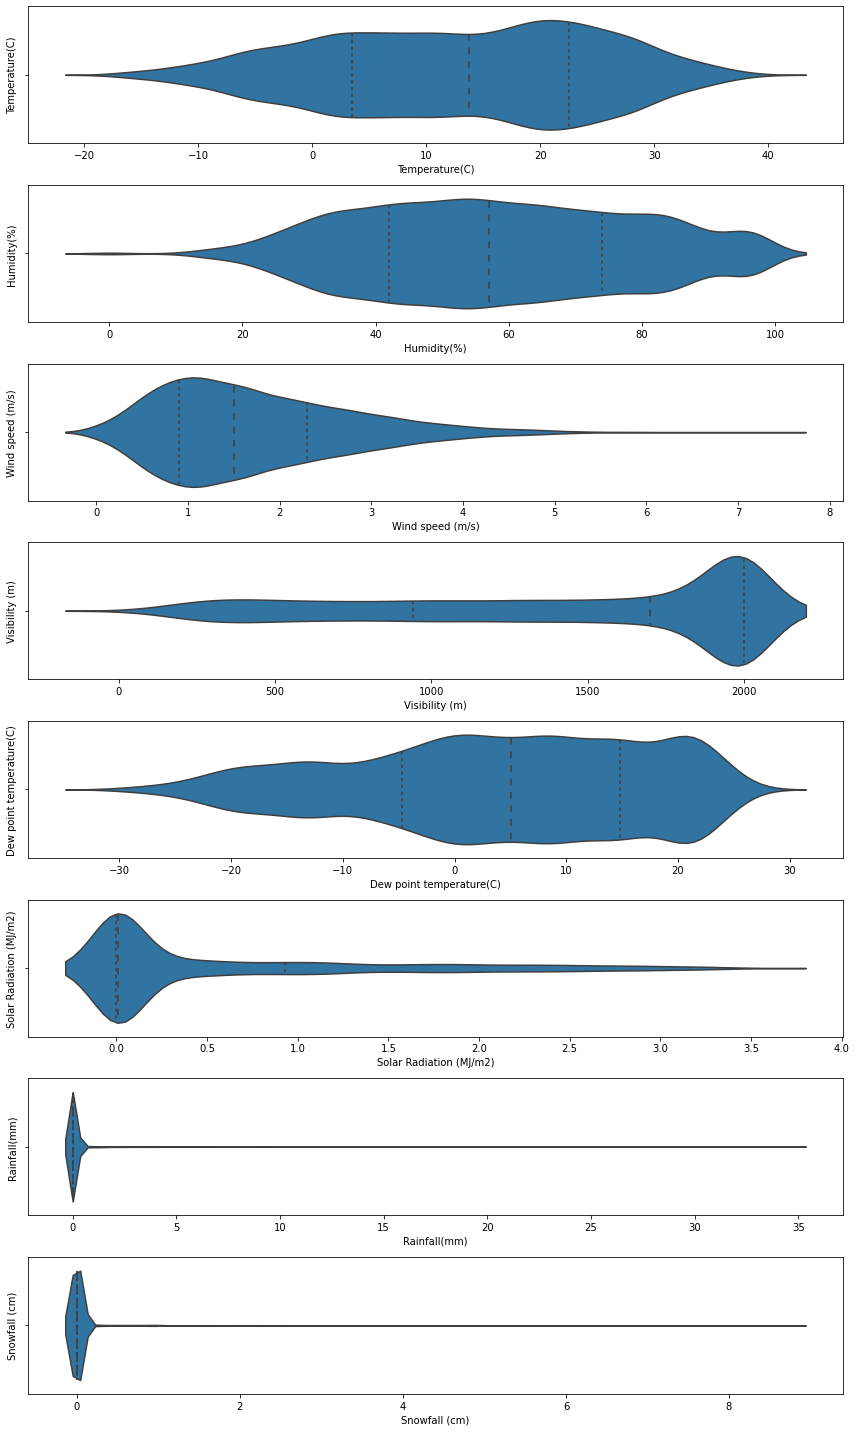

In [118]:
df_SeoulClimaticConditions = df_bike.drop(['Number of Bikes','Date','Hour','Seasons','Holiday','Functioning Day'], axis = 1)

plt.figure(figsize=(12,20))
for i, col in enumerate(df_SeoulClimaticConditions.columns, 1):
    plt.subplot(len(df_SeoulClimaticConditions.columns),1,i)
    sns.violinplot(df_SeoulClimaticConditions[col], inner='quartiles')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

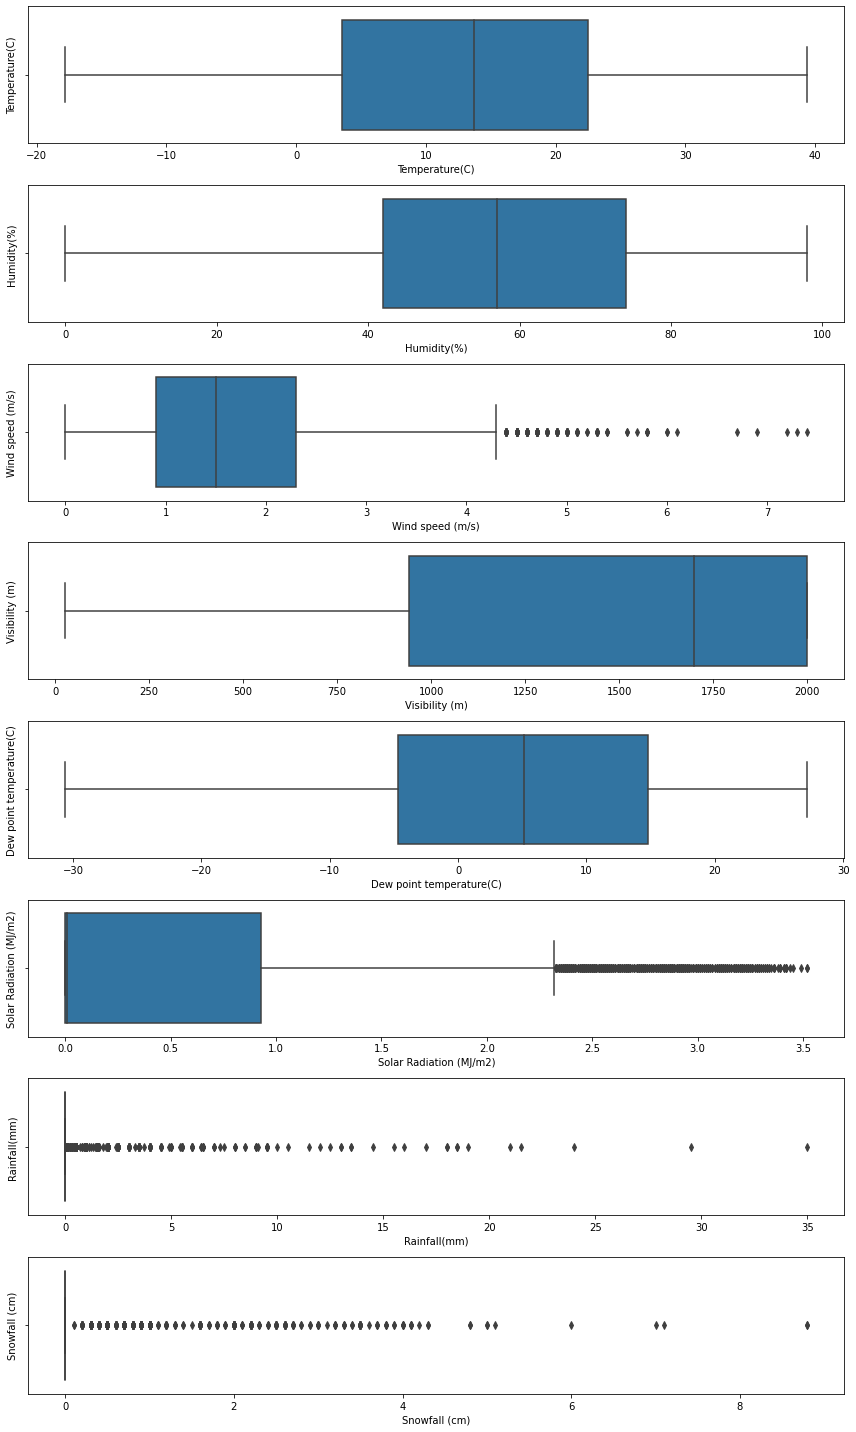

In [143]:
plt.figure(figsize=(12,20))
for i, col in enumerate(df_SeoulClimaticConditions.columns, 1):
    plt.subplot(len(df_SeoulClimaticConditions.columns),1,i)
    sns.boxplot(df_SeoulClimaticConditions[col])
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

In [119]:
# To prove point 'a'
print(f"Maximum Wind Speed:{df_SeoulClimaticConditions['Wind speed (m/s)'].max()}")

Maximum Wind Speed:7.4


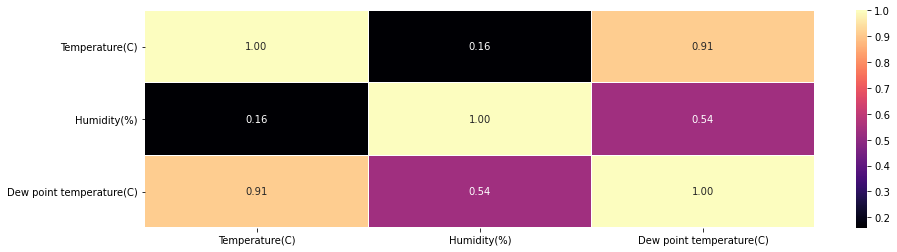

In [120]:
# To prove point 'b'
df_DewPointCorrelation = df_SeoulClimaticConditions.drop(['Wind speed (m/s)', 'Visibility (m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)'], axis = 1)
fig,ax = plt.subplots(figsize=(15, 4))   
sns.heatmap(df_DewPointCorrelation.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [121]:
# df_BikesRentedVsClimate = df_bike.drop(['Date','Hour','Seasons','Holiday','Functioning Day', 'Wind speed (m/s)', 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)'], axis = 1)
# fig,ax = plt.subplots(figsize=(10, 10))   
# sns.heatmap(df_BikesRentedVsClimate.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
# plt.show()

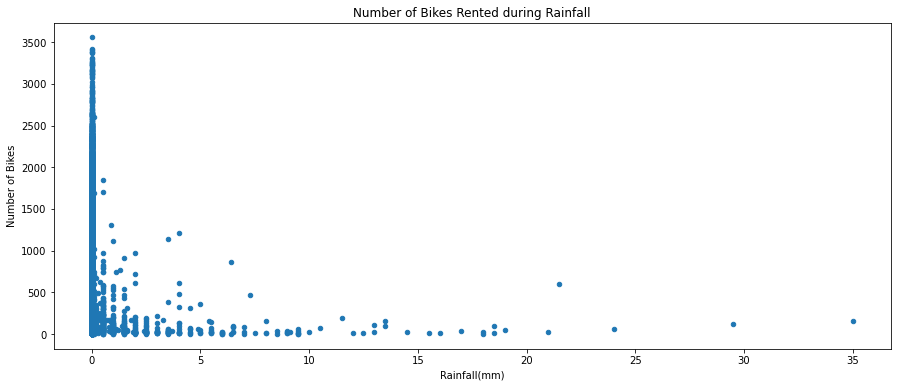

In [122]:
df_bike[['Number of Bikes','Rainfall(mm)']].plot.scatter(x='Rainfall(mm)', y='Number of Bikes')
plt.title('Number of Bikes Rented during Rainfall')
plt.show()

The number of bikes rented drastically reduces as the amount of rain increases

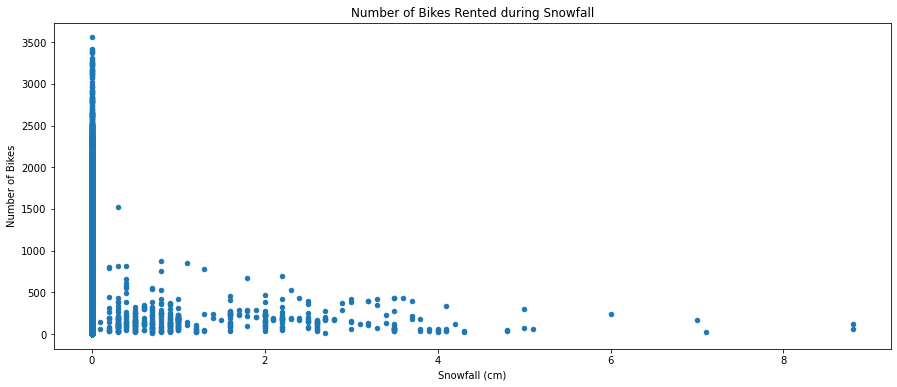

In [123]:
df_bike[['Number of Bikes','Snowfall (cm)']].plot.scatter(x='Snowfall (cm)', y='Number of Bikes')
plt.title('Number of Bikes Rented during Snowfall')
plt.show()

In [124]:
df_MoreThanIdealRain = df_bike[df_bike['Rainfall(mm)']>0]
df_MoreThanIdealSnow = df_bike[df_bike['Snowfall (cm)']>0]

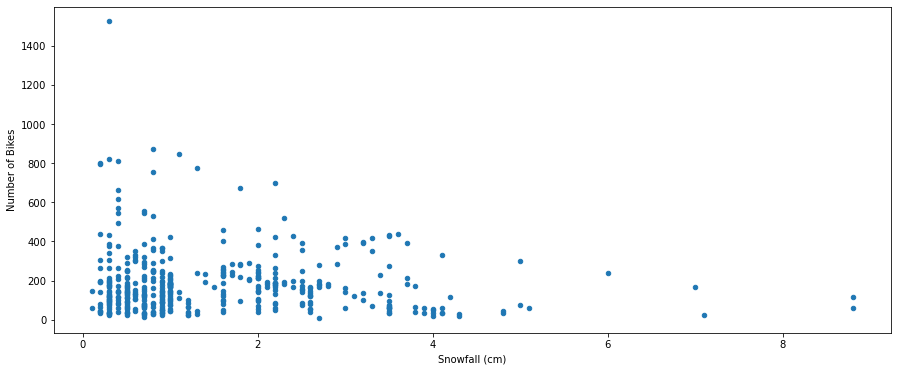

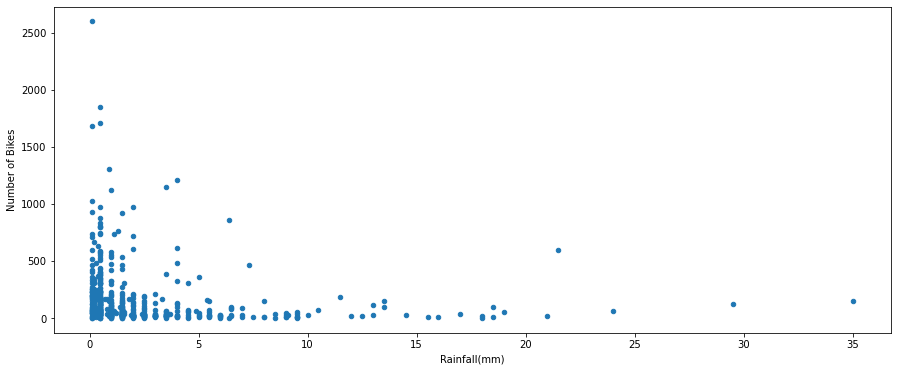

In [125]:
df_MoreThanIdealSnow[['Number of Bikes','Snowfall (cm)']].plot.scatter(x='Snowfall (cm)', y='Number of Bikes')
df_MoreThanIdealRain[['Number of Bikes','Rainfall(mm)']].plot.scatter(x='Rainfall(mm)', y='Number of Bikes')
plt.show()

A comparison between the two graphs above - against Rainfall and Snowfall - we can generally notice that Snowfall doesn't deter Bike riders as much as Rainfall does.

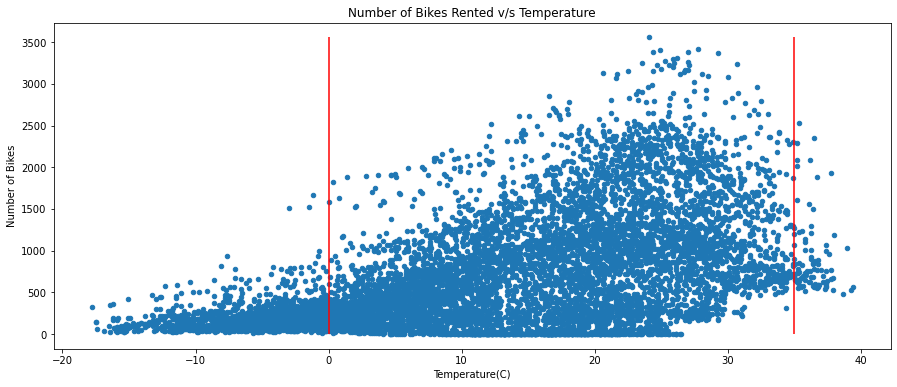

In [126]:
df_bike[['Number of Bikes','Temperature(C)']].plot.scatter(x='Temperature(C)', y='Number of Bikes')
plt.vlines(x=[0, 35], ymin=df_bike['Number of Bikes'].min(), ymax=df_bike['Number of Bikes'].max(), colors=['red'])
plt.title('Number of Bikes Rented v/s Temperature')
plt.show()

In general, we do notice that more people pick up bikes while the ambient temperatures are within the tolerable range.

Further, we see a sheer drop in numbers beyond 35 degree C - Sweaty conditions!!

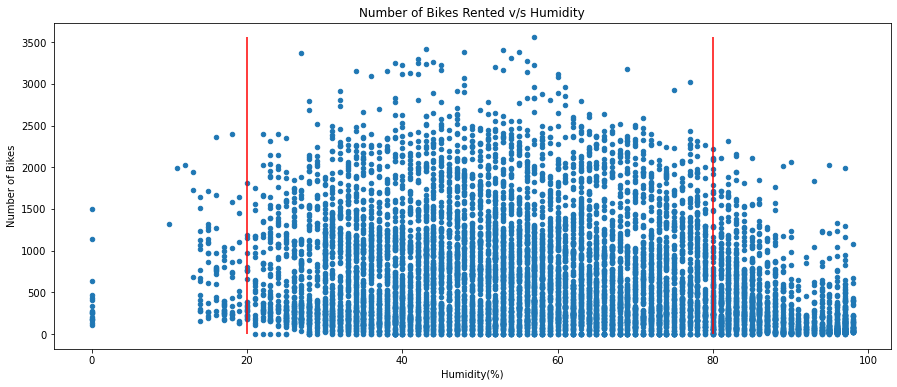

In [127]:
# Humidity(%)

df_bike[['Number of Bikes','Humidity(%)']].plot.scatter(x='Humidity(%)', y='Number of Bikes')
plt.vlines(x=[20, 80], ymin=df_bike['Number of Bikes'].min(), ymax=df_bike['Number of Bikes'].max(), colors=['red'])
plt.title('Number of Bikes Rented v/s Humidity')
plt.show()

In [128]:
fig = px.scatter_3d(df_bike, x='Temperature(C)', y='Humidity(%)', z='Number of Bikes',
                    color='Number of Bikes')

fig.show()

The above 3D image shows the relationship between the 3 variables - Number of Bikes, Temperature and Humidity. More people venture out on bikes mostly when it is mostly balanced.

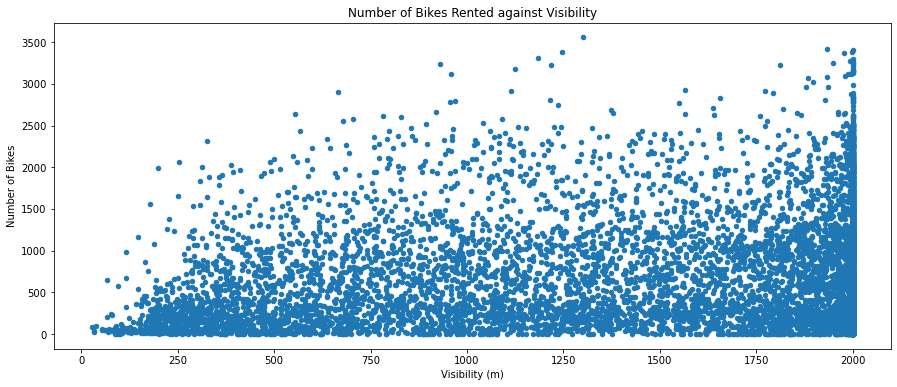

In [129]:
df_bike[['Number of Bikes','Visibility (m)']].plot.scatter(x='Visibility (m)', y='Number of Bikes')
plt.title('Number of Bikes Rented against Visibility')
plt.show()

### Analysis of human Conventions

S. Korea's work culture is notoriously punishing. Its people work some of the longest hours in the OECD, a club mostly of rich countries.

source: economist.com<br>
*OECD: The Organisation for Economic Co-operation and Development*

Following 2 features can be considered to analyze how the human conventions influence the number of Bikes Rented:
1. Hour
2. Holiday

We can discard Date and Functioning Day classifiers for this analysis.

In [130]:
df_SeoulHumanConventions = df_bike[['Number of Bikes','Hour','Holiday']]
df_SeoulHumanConventions.columns

Index(['Number of Bikes', 'Hour', 'Holiday'], dtype='object')

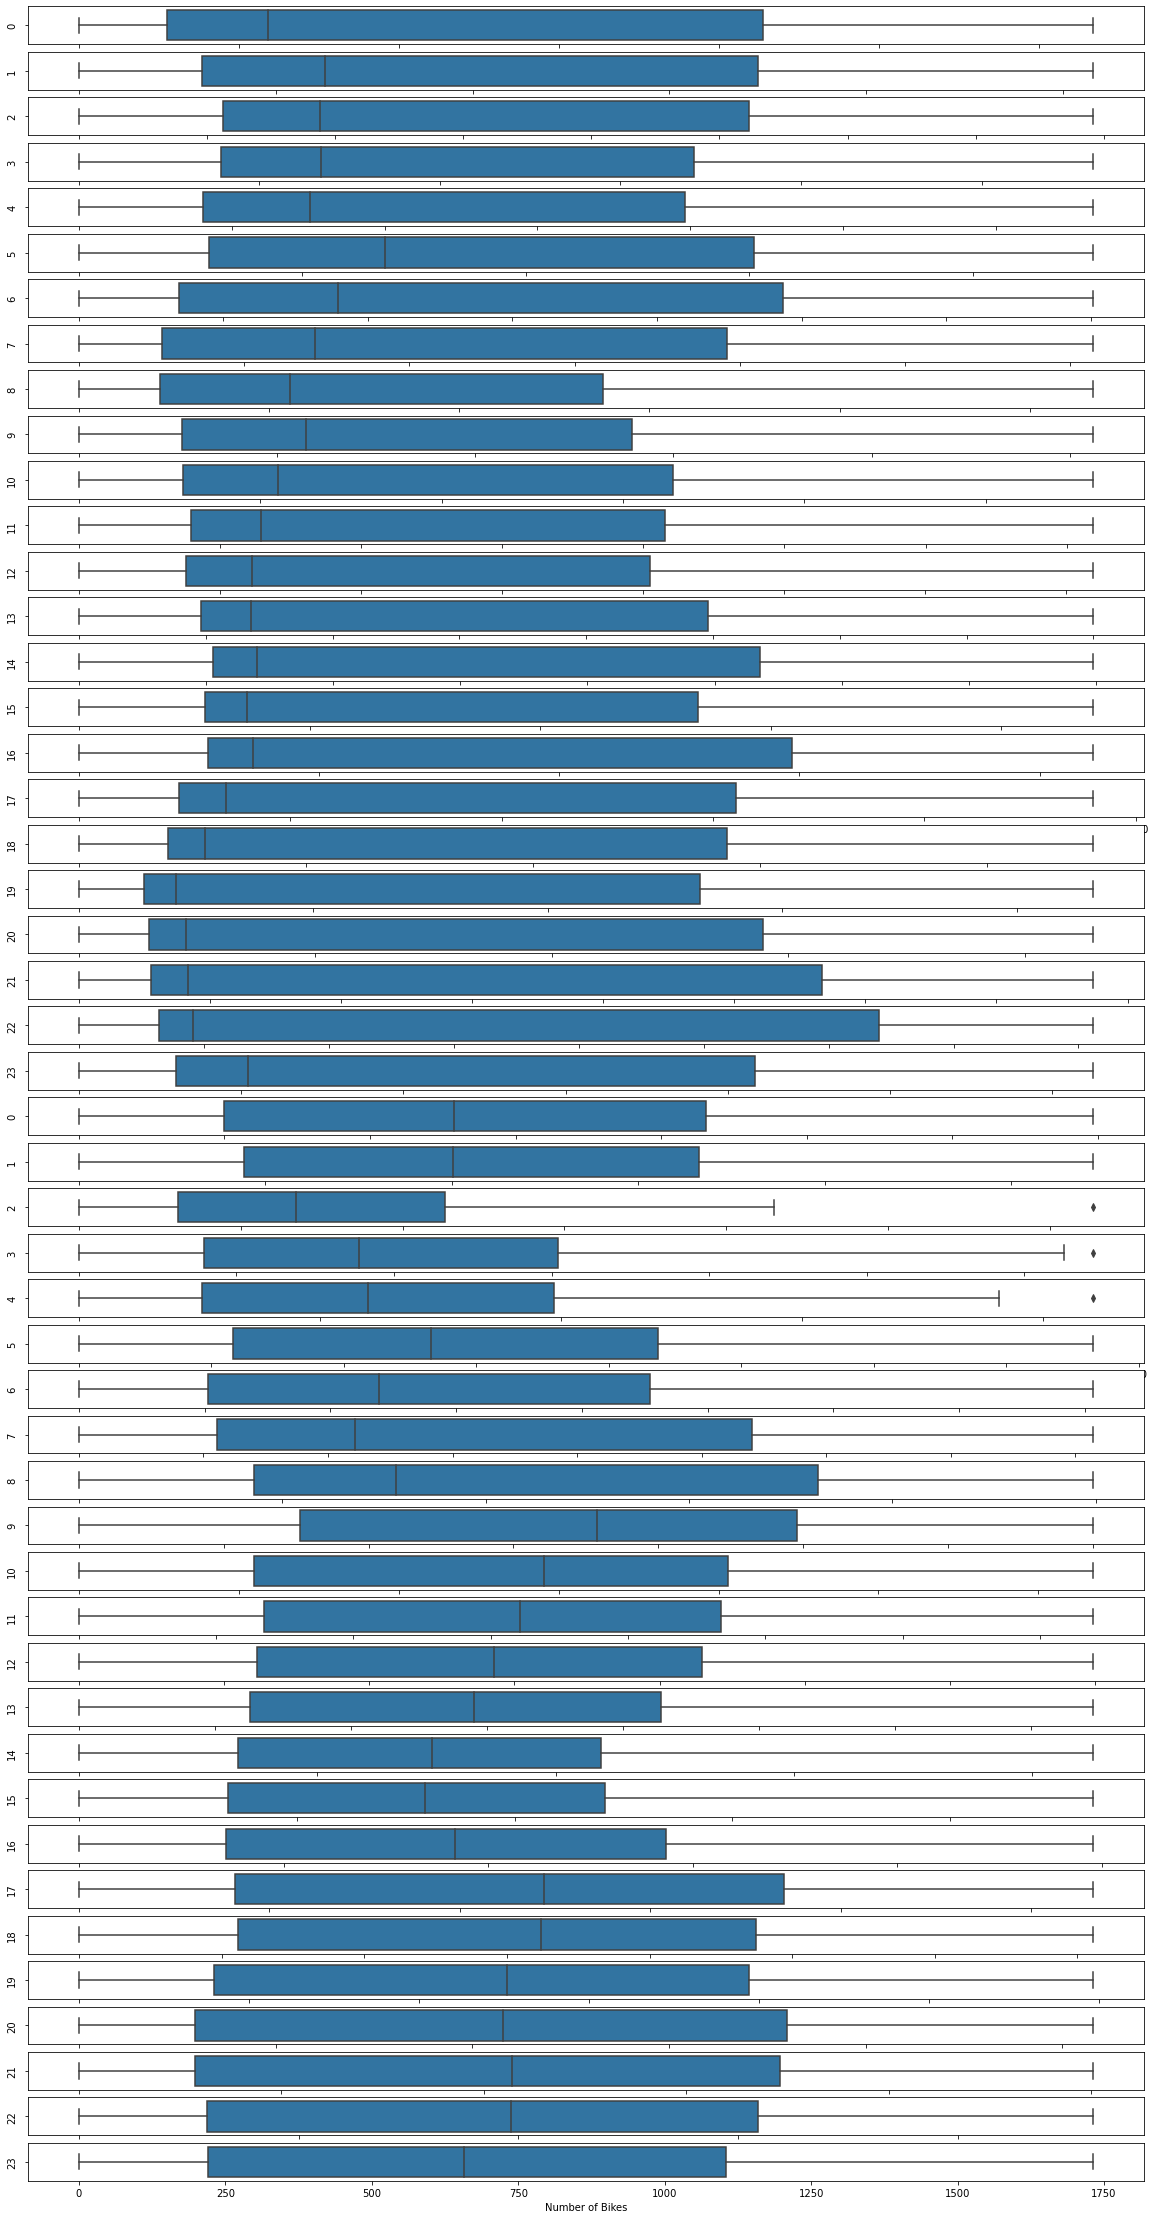

In [131]:
plt.figure(figsize=(20,40))
i=0
for holiday_yn in df_SeoulHumanConventions.groupby('Holiday'):
    for each_hour in holiday_yn[1].groupby('Hour'):
        i+=1
        plt.subplot(48, 1, i)
        plt.ylabel(each_hour[0])
        sns.boxplot(each_hour[1]['Number of Bikes'])
plt.show()

In [132]:
for holiday_yn in df_SeoulHumanConventions.groupby('Holiday'):
    print(f"On {holiday_yn[0]}, on average {round(holiday_yn[1]['Number of Bikes'].mean())} bikes were rented")

On Holiday, on average 500 bikes were rented
On No Holiday, on average 715 bikes were rented


****From the above plots and the mean values - we can conclude that less number of people rented bikes on a Holiday and thus it's essential to keep this feature in our model.****

Text(0.5, 1.0, 'Average Number of Bikes Rented against Hour of the day')

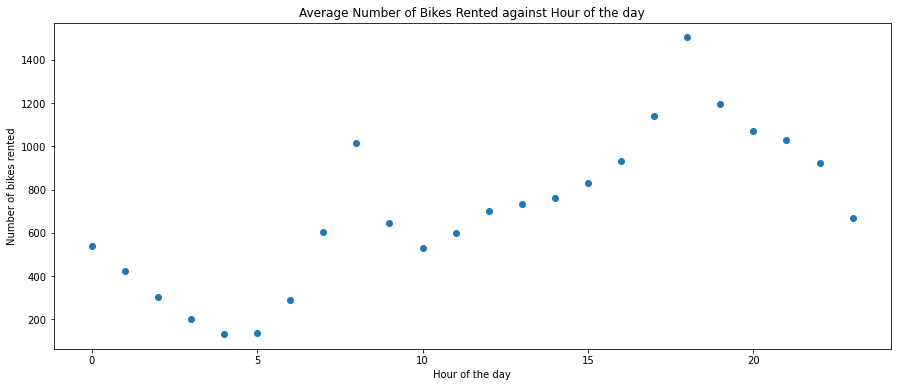

In [133]:
hour_data = {}
for hour in df_SeoulHumanConventions.groupby('Hour'):
#     print(f"At {hour[0]} hour, on average {round(hour[1]['Number of Bikes'].mean())} were rented")
    hour_data[hour[0]] = round(hour[1]['Number of Bikes'].mean())
    
plt.scatter(hour_data.keys() , hour_data.values())
plt.xlabel("Hour of the day")
plt.ylabel("Number of bikes rented")
plt.title('Average Number of Bikes Rented against Hour of the day')

***Similarly, we can also conclude that the hour of the day mattered while deciding on the number of bikes rented as it differed based on the number of people out on streets - either because it's peak commute hour or the after office leasure hours.***

### OLS Model Building

In [134]:
df_bike_new = df_bike.copy()

# Removing the insignifcant valriables
df_bike_new.drop(['Date'], axis=1, inplace=True)
df_bike_new.head(5)

,Number of Bikes,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
1,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
2,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
3,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
4,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes


### Derive a new feature based on 'Hours' as 'Time of the day'

In [135]:
df_bike_new['time_of_the_day'] = np.where(df_bike_new['Hour']==0, 'Midnight', 
                                          np.where((df_bike_new['Hour']>0) & (df_bike_new['Hour']<=5), 'Early Morning',
                                                  np.where((df_bike_new['Hour']>5) & (df_bike_new['Hour']<=11), 'Morning',
                                                          np.where((df_bike_new['Hour']>11) & (df_bike_new['Hour']<=12), 'Noon',
                                                                  np.where((df_bike_new['Hour']>12) & (df_bike_new['Hour']<=18),  'Afternoon',
                                                                          np.where((df_bike_new['Hour']>18) , 'Early Morning','NA'))))))

In [136]:
df_bike_new.head(5)

,Number of Bikes,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,time_of_the_day
0,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,Midnight
1,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,Early Morning
2,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,Early Morning
3,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,Early Morning
4,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,Early Morning


In [137]:
# Drop the variable 'Hour'
# df_bike_new.drop('Hour', axis=1, inplace=True)


In [138]:
df_bike_new.head()

,Number of Bikes,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,time_of_the_day
0,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,Midnight
1,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,Early Morning
2,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,Early Morning
3,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,Early Morning
4,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,Early Morning


In [139]:
df_bike_new.describe()

,Number of Bikes,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [144]:
# calculate the first quartile
Q1 = df_bike_new.quantile(0.25)

# calculate the third quartile
Q3 = df_bike_new.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_bike_new = df_bike_new[~((df_bike_new < (Q1 - 1.5 * IQR)) | (df_bike_new > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_bike_new.shape

(6922, 14)

In [145]:
df_bike_new.describe()

,Number of Bikes,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000,6922.000000
mean,705.297602,11.274487,12.466094,57.829818,1.604652,1467.047385,3.745550,0.413180,0.000000,0.000000
std,602.386858,7.229378,11.447255,18.728656,0.933048,589.616569,12.842695,0.649744,0.000000,0.000000
min,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-25.600000,0.000000,0.000000,0.000000
25%,223.000000,5.000000,3.700000,44.000000,0.900000,990.000000,-5.200000,0.000000,0.000000,0.000000
50%,524.500000,10.000000,12.600000,58.000000,1.400000,1727.000000,4.400000,0.000000,0.000000,0.000000
75%,1062.000000,18.000000,21.600000,72.000000,2.200000,2000.000000,14.200000,0.677500,0.000000,0.000000
max,2375.000000,23.000000,39.000000,98.000000,4.300000,2000.000000,26.100000,2.320000,0.000000,0.000000


***Check the presence of Null values***

In [146]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_bike_new.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_bike_new.isnull().sum()*100/df_bike_new.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Number of Bikes,0,0.000000
Hour,0,0.000000
Temperature(C),0,0.000000
Humidity(%),0,0.000000
Wind speed (m/s),0,0.000000
Visibility (m),0,0.000000
Dew point temperature(C),0,0.000000
Solar Radiation (MJ/m2),0,0.000000
Rainfall(mm),0,0.000000
Snowfall (cm),0,0.000000


In [147]:
# scale the independent numeric variables
df_bike_new.iloc[:, :9] = df_bike_new.iloc[:, :9].apply(lambda rec: (rec - rec.mean()) / rec.std())

df_bike_new.head()

,Number of Bikes,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,time_of_the_day
0,-0.749182,-1.559538,-1.543260,-1.112190,0.638068,0.903897,-1.662077,-0.635911,NaN,0.000000,Winter,No Holiday,Yes,Midnight
1,-0.832185,-1.421213,-1.569467,-1.058796,-0.862391,0.903897,-1.662077,-0.635911,NaN,0.000000,Winter,No Holiday,Yes,Early Morning
2,-0.883647,-1.282889,-1.613146,-1.005401,-0.648040,0.903897,-1.669864,-0.635911,NaN,0.000000,Winter,No Holiday,Yes,Early Morning
3,-0.993212,-1.144564,-1.630617,-0.952007,-0.755215,0.903897,-1.662077,-0.635911,NaN,0.000000,Winter,No Holiday,Yes,Early Morning
4,-1.041353,-1.006240,-1.613146,-1.165584,0.745244,0.903897,-1.739943,-0.635911,NaN,0.000000,Winter,No Holiday,Yes,Early Morning


In [148]:
df_bike_new.drop(['Rainfall(mm)', 'Snowfall (cm)'], axis=1, inplace=True)

In [149]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = df_bike_new.drop('Number of Bikes', axis = 1)

# create dataframe of target variable
df_target = df_bike_new['Number of Bikes']

In [150]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)'],
      dtype='object')

In [151]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

Index(['Seasons', 'Holiday', 'Functioning Day', 'time_of_the_day'], dtype='object')

The OLS method fails in the presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the categorical variables and create (n-1) dummyencoding.**

In [152]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)
encoded_data.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,time_of_the_day_Early Morning,time_of_the_day_Midnight,time_of_the_day_Morning,time_of_the_day_Noon
0,0,0,1,1,1,0,1,0,0
1,0,0,1,1,1,1,0,0,0
2,0,0,1,1,1,1,0,0,0
3,0,0,1,1,1,1,0,0,0
4,0,0,1,1,1,1,0,0,0


In [153]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_bike_new_dummy = pd.concat([df_num, encoded_data], axis=1)

# display first five observations
df_bike_new_dummy.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Dew point temperature(C),Solar Radiation (MJ/m2),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,time_of_the_day_Early Morning,time_of_the_day_Midnight,time_of_the_day_Morning,time_of_the_day_Noon
0,-1.559538,-1.543260,-1.112190,0.638068,0.903897,-1.662077,-0.635911,0,0,1,1,1,0,1,0,0
1,-1.421213,-1.569467,-1.058796,-0.862391,0.903897,-1.662077,-0.635911,0,0,1,1,1,1,0,0,0
2,-1.282889,-1.613146,-1.005401,-0.648040,0.903897,-1.669864,-0.635911,0,0,1,1,1,1,0,0,0
3,-1.144564,-1.630617,-0.952007,-0.755215,0.903897,-1.662077,-0.635911,0,0,1,1,1,1,0,0,0
4,-1.006240,-1.613146,-1.165584,0.745244,0.903897,-1.739943,-0.635911,0,0,1,1,1,1,0,0,0


**Interpretation:** We can see that the dummy variables are added to the data.

#### Split the data into training and test sets.

In [ ]:
# set of independent variables
# create a copy of 'df_bike_new_dummy' and store in the dataframe 'X'
X = df_bike_new_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y'
y = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

In [155]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR.summary())

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     451.1
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:22:07   Log-Likelihood:                -4641.9
No. Observations:                4845   AIC:                             9318.
Df Residuals:                    4828   BIC:                             9428.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

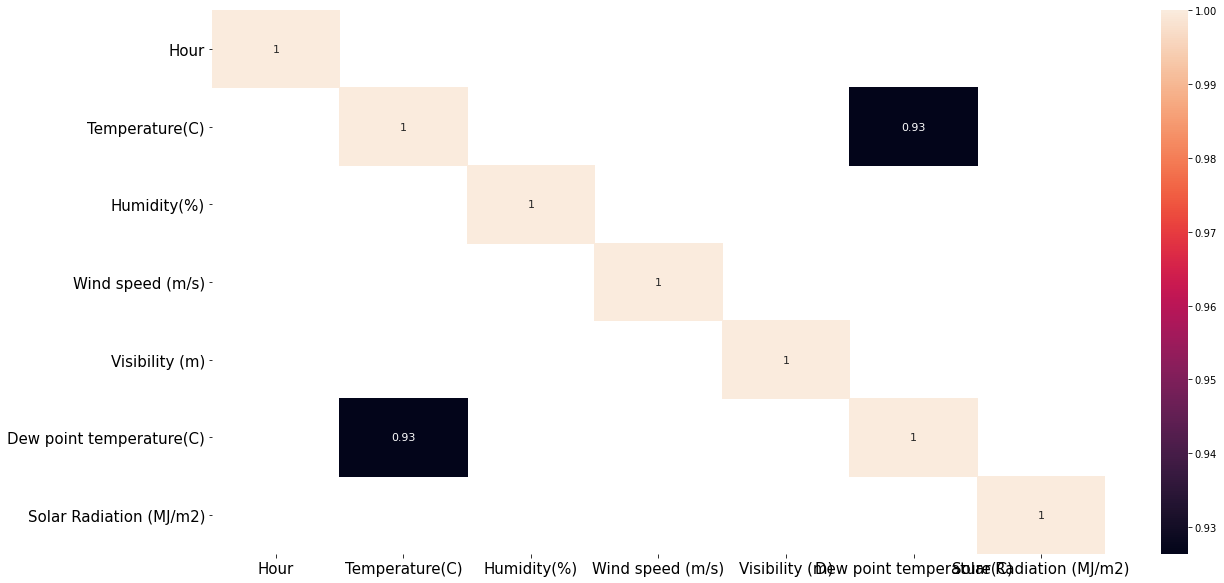

In [156]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_feature.corr()[np.abs(df_feature.corr()) > 0.6], annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above heatmap, show the variables having a strong positive/negative correlation. The variables with dark blue shade represent the strong positive correlation and the ones with lighter shade represent the strong negative correlation.

***Variance Inflation Factor (VIF):***

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   

Steps to calculate VIF:<br>
1. Regress one independent variable (say V<sub>i</sub>) on all the remaining independent variables (say V<sub>j</sub>, j ≠ i)
2. Calculate R-squared of the regression model
3. Calculate VIF for the variable V<sub>i</sub> using the formula:
<p style='text-indent:29em'> <strong> VIF = 1 / (1 - R-squared)</strong>  </p><br>
4. Repeate the steps 1 to 3 to calculate VIF of each independent variable

In [157]:
# filter the numerical features in the dataset
df_numeric_features_vif = df_feature.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Dew point temperature(C),Solar Radiation (MJ/m2)
0,-1.559538,-1.543260,-1.112190,0.638068,0.903897,-1.662077,-0.635911
1,-1.421213,-1.569467,-1.058796,-0.862391,0.903897,-1.662077,-0.635911
2,-1.282889,-1.613146,-1.005401,-0.648040,0.903897,-1.669864,-0.635911
3,-1.144564,-1.630617,-0.952007,-0.755215,0.903897,-1.662077,-0.635911
4,-1.006240,-1.613146,-1.165584,0.745244,0.903897,-1.739943,-0.635911


Calculate the VIF for each numeric variable.

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,117.460727,Dew point temperature(C)
1,84.273316,Temperature(C)
2,17.826827,Humidity(%)
3,1.645102,Solar Radiation (MJ/m2)
4,1.419121,Visibility (m)
5,1.251283,Wind speed (m/s)
6,1.194764,Hour


The output shows that the variable 'Temperature(C)' has the highest VIF. Now, we use the `for loop` to find VIF and remove the variables with VIF greater than 20. 

In [160]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 20 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 20 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 20), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 20  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor                 Features
0    1.191653                     Hour
1    1.437284           Temperature(C)
2    2.119592              Humidity(%)
3    1.247399         Wind speed (m/s)
4    1.415611           Visibility (m)
5    1.591721  Solar Radiation (MJ/m2)


In [161]:
# display the first 5 observations
df_numeric_features_vif.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Solar Radiation (MJ/m2)
0,-1.559538,-1.543260,-1.112190,0.638068,0.903897,-0.635911
1,-1.421213,-1.569467,-1.058796,-0.862391,0.903897,-0.635911
2,-1.282889,-1.613146,-1.005401,-0.648040,0.903897,-0.635911
3,-1.144564,-1.630617,-0.952007,-0.755215,0.903897,-0.635911
4,-1.006240,-1.613146,-1.165584,0.745244,0.903897,-0.635911


**Interpretation** Now, we have all the variables with VIF less than 20. So, we can conclude that there is no multicollinearity in the data.<br>
We will use the above dataframe "df_numeric_features_vif" to build the MLR model with significant variables.

#### MLR Model after Removing Insignificant Variables

In [162]:
# display numeric features obtained from VIF
df_numeric_features_vif.columns

Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (m)', 'Solar Radiation (MJ/m2)'],
      dtype='object')

In [163]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

Index(['Seasons', 'Holiday', 'Functioning Day', 'time_of_the_day'], dtype='object')

#### Concatenate numerical and dummy encoded categorical variables.

In [164]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_bike_new_sig_dummy = pd.concat([df_numeric_features_vif, encoded_data], axis=1)

# display first five observations
df_bike_new_sig_dummy.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (m),Solar Radiation (MJ/m2),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,time_of_the_day_Early Morning,time_of_the_day_Midnight,time_of_the_day_Morning,time_of_the_day_Noon
0,-1.559538,-1.543260,-1.112190,0.638068,0.903897,-0.635911,0,0,1,1,1,0,1,0,0
1,-1.421213,-1.569467,-1.058796,-0.862391,0.903897,-0.635911,0,0,1,1,1,1,0,0,0
2,-1.282889,-1.613146,-1.005401,-0.648040,0.903897,-0.635911,0,0,1,1,1,1,0,0,0
3,-1.144564,-1.630617,-0.952007,-0.755215,0.903897,-0.635911,0,0,1,1,1,1,0,0,0
4,-1.006240,-1.613146,-1.165584,0.745244,0.903897,-0.635911,0,0,1,1,1,1,0,0,0


In [165]:
# set of independent variables
# create a copy of 'df_bike_new_dummy' and store in the dataframe 'X_signi_var'
X_signi_var = df_bike_new_sig_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_signi_var'
y_signi_var = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_signi_var = sm.add_constant(X_signi_var)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_signi_var, X_test_signi_var, y_train_signi_var, y_test_signi_var = train_test_split(X_signi_var, y_signi_var, 
                                                                                            random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_signi_var', X_train_signi_var.shape)
print('y_train_signi_var', y_train_signi_var.shape)

# print dimension of test set
print('X_test_signi_var', X_test_signi_var.shape)
print('y_test_signi_var', y_test_signi_var.shape)

X_train_signi_var (4845, 16)
y_train_signi_var (4845,)
X_test_signi_var (2077, 16)
y_test_signi_var (2077,)


In [166]:
# print(X_train_signi_var.head())
X_train = X_train_signi_var
Y_train = y_train_signi_var

MLR_model_vif = sm.OLS(y_train, X_train).fit()
print(MLR_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     481.2
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:22:09   Log-Likelihood:                -4641.9
No. Observations:                4845   AIC:                             9316.
Df Residuals:                    4829   BIC:                             9420.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Understanding the outputs of the model: Is this statistically significant?

#### Do we have enough basis to determine if our model is sufficient or not by looking at those numbers.

##### What is the p-value?
<br/>
P-value or probability value shows statistical significance. 0.05 is generally used for max limit (95% confidence level), so if we have p-value smaller than 0.05, it is significant. The smaller the p-value is, the better our results!
<br/><br/>
Looking at our summary table, we can see, 'Visibility (m)' is statistically insignificant because its p-value is 0.864. So it will be better to drop it.

##### What is R squared and Adjusted R squared?
R square is a simple but powerful metric that shows how much variance is explained by the model. It counts all variables we defined in X and gives a percentage of explanation. 
<br/><br/>
Adjusted R squared is also similar to R squared but it counts only statistically significant variables. That is why it is better to look at adjusted R squared all the time.
<br/><br/>

##### What is Coef?
They are coefficients of the variables which give us the equation of the model.

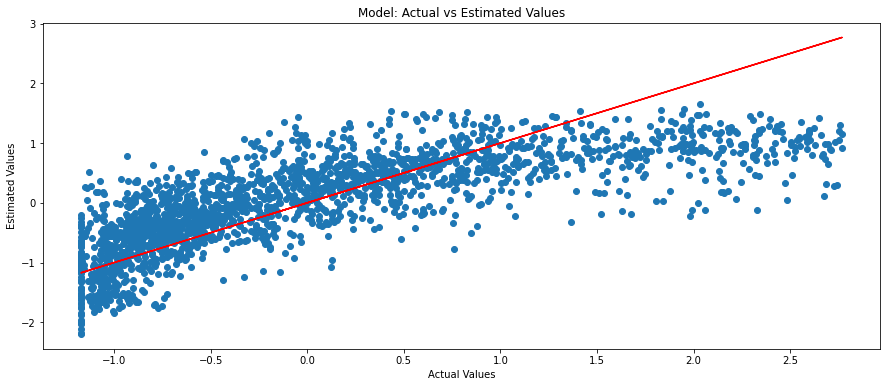

In [167]:
X_test = X_test_signi_var
Y_test = y_test_signi_var

Y_preds = MLR_model_vif.predict(X_test)

plt.figure(figsize=(15, 6))
plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("Actual Values")
plt.ylabel("Estimated Values")
plt.title("Model: Actual vs Estimated Values")
plt.show()

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     698.9
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:22:09   Log-Likelihood:                -4689.8
No. Observations:                4845   AIC:                             9402.
Df Residuals:                    4834   BIC:                             9473.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

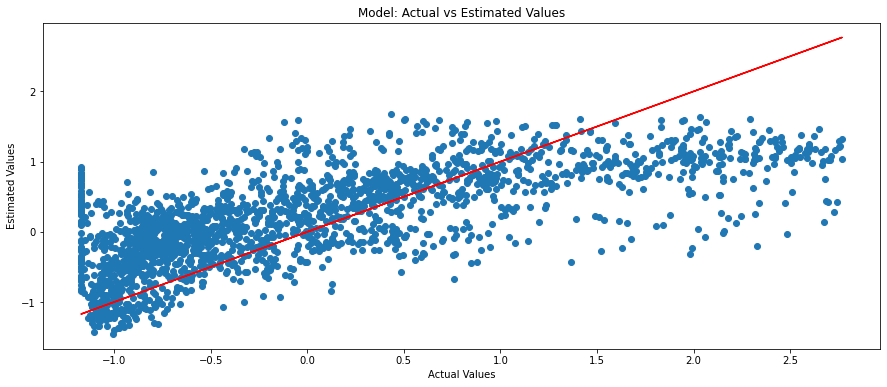

In [168]:
# print(X_train_signi_var.head())
drop_columns = ['Visibility (m)', 'time_of_the_day_Noon', 'Holiday_No Holiday', 'Solar Radiation (MJ/m2)', 'Wind speed (m/s)']
X_train2 = X_train_signi_var.drop(drop_columns, axis=1)
Y_train2 = y_train_signi_var

const = X_train2['const']
X_train2 = ( X_train2 - (np.mean(X_train2, axis = 0) ) ) / np.std(X_train2, axis= 0)  
X_train2['const'] = const

results2 = sm.OLS(Y_train2, X_train2).fit()
print(results2.summary())

X_test2 = X_test_signi_var.drop(drop_columns, axis=1)
Y_test2 = y_test_signi_var

Y_preds2 = results2.predict(X_test2)

plt.figure(figsize=(15, 6))
plt.scatter(Y_test2, Y_preds2)
plt.plot(Y_test2, Y_test2, color="red")
plt.xlabel("Actual Values")
plt.ylabel("Estimated Values")
plt.title("Model: Actual vs Estimated Values")
plt.show()

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     170.2
Date:                Sat, 18 Sep 2021   Prob (F-statistic):          1.71e-307
Time:                        09:22:09   Log-Likelihood:                -6125.9
No. Observations:                4845   AIC:                         1.227e+04
Df Residuals:                    4834   BIC:                         1.235e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

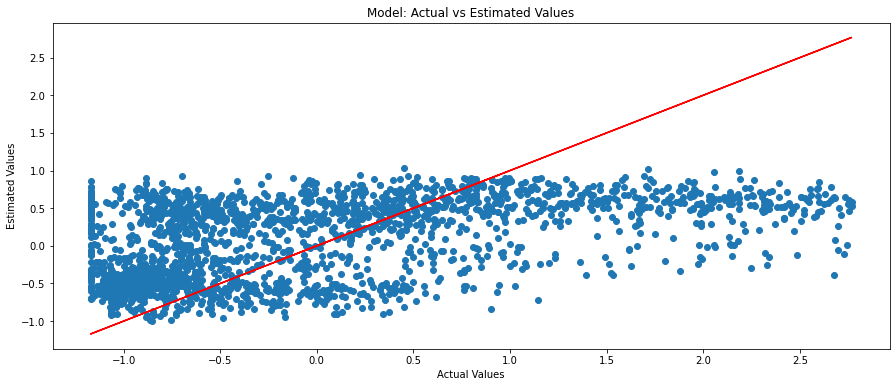

In [169]:
# print(X_train_signi_var.head())
drop_columns = ['Functioning Day_Yes', 'Temperature(C)', 'Seasons_Summer', 'Seasons_Winter', 'Humidity(%)']
X_train3 = X_train_signi_var.drop(drop_columns, axis=1)
Y_train3 = y_train_signi_var

const = X_train3['const']
X_train3 = ( X_train3 - (np.mean(X_train3, axis = 0) ) ) / np.std(X_train3, axis= 0)  
X_train3['const'] = const

results3 = sm.OLS(Y_train3, X_train3).fit()
print(results3.summary())

X_test3 = X_test_signi_var.drop(drop_columns, axis=1)
Y_test3 = y_test_signi_var

Y_preds3 = results3.predict(X_test3)

plt.figure(figsize=(15, 6))
plt.scatter(Y_test3, Y_preds3)
plt.plot(Y_test3, Y_test3, color="red")
plt.xlabel("Actual Values")
plt.ylabel("Estimated Values")
plt.title("Model: Actual vs Estimated Values")
plt.show()

### Gradient Descent
#### Hypothesis function for univariate linear regression is h(x) = theta_0 + theta_1*x_1 where x_1 is only input value
#### For multiple input value, hypothesis function will look like:
#### h(x) = theta_0 + theta_1 * x_1 + theta_2 * x_2 .....theat_n * x_n where x_1, x_2...x_n are multiple input values
#### Gradient descent algorithm function format remains same as used in Univariate linear regression. But here we have to do it for all the theta values(no of theta values = no of features + 1).

Total no of training examples (m) = 4845 

Final value of theta = const                           -0.012550
Hour                             0.406168
Temperature(C)                   0.436115
Humidity(%)                     -0.151056
Seasons_Spring                  -0.098479
Seasons_Summer                  -0.087714
Seasons_Winter                  -0.271655
Functioning Day_Yes              0.298729
time_of_the_day_Early Morning   -0.035299
time_of_the_day_Midnight         0.109919
time_of_the_day_Morning          0.077622
dtype: float64
First 5 values from cost_history = [0.32760974 0.26863208 0.24265405 0.22933152 0.22178996]
Last 5 values from cost_history = [0.20289294 0.20289294 0.20289294 0.20289294 0.20289294]


Text(0.5, 1.0, 'Convergence of gradient descent')

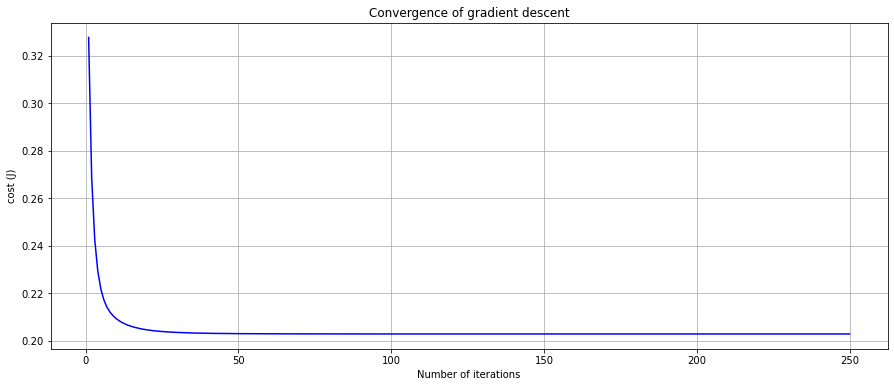

In [170]:
drop_columns = ['Visibility (m)', 'time_of_the_day_Noon', 'Holiday_No Holiday', 'Solar Radiation (MJ/m2)', 'Wind speed (m/s)']
X_train2 = X_train_signi_var.drop(drop_columns, axis=1)
Y_train2 = y_train_signi_var

X_test2 = X_test_signi_var.drop(drop_columns, axis=1)
Y_test2 = y_test_signi_var

m = len(X_train2) # No. of training examples
print('Total no of training examples (m) = %s \n' %(m))

const = X_train2['const']
X_train2 = ( X_train2 - (np.mean(X_train2, axis = 0) ) ) / np.std(X_train2, axis= 0)  
X_train2['const'] = const

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1/(2 * m) * errors.T.dot(errors)
    return J
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)  
    return theta, cost_history

theta = np.zeros(X_train2.shape[1])
iterations = 250;
alpha = 0.25;

theta, cost_history = gradient_descent(X_train2, Y_train2, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (15,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")



### Model comparison

In [171]:
print("==============================================================")
y_train_predict = MLR_model_vif.predict(X_train_signi_var)
y_test_predict = MLR_model_vif.predict(X_test_signi_var)

md1_rmse_train = round(np.sqrt(mean_squared_error(y_train, y_train_predict)), 4)
print("Root Mean Squared Error (RMSE) on training set: ", md1_rmse_train)

md1_rmse_test = round(np.sqrt(mean_squared_error(y_test, y_test_predict)), 4)
print("Root Mean Squared Error (RMSE) on testing set: ", md1_rmse_test)
print("==============================================================")

Root Mean Squared Error (RMSE) on training set:  0.6307
Root Mean Squared Error (RMSE) on testing set:  0.6518


### Ridge Regression

In [172]:
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=3)
reg_cv_score = cross_val_score(model, X_train_signi_var,y_train_signi_var, cv=cv)
reg_cv_mse = cross_val_score(model, X_train_signi_var,y_train_signi_var, cv=cv,scoring='neg_mean_squared_error')

print('R2 :',np.mean(reg_cv_score))
print('RMSE :',np.sqrt(np.abs(np.mean(reg_cv_mse))))

R2 : 0.595443646534099
RMSE : 0.6327300324287124


### Random Forest Regressor

In [183]:
model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=3)
reg_cv_score = cross_val_score(model, X_train_signi_var,y_train_signi_var, cv=cv)
reg_cv_mse = cross_val_score(model, X_train_signi_var,y_train_signi_var, cv=cv,scoring='neg_mean_squared_error')

print('R2 :',np.mean(reg_cv_score))
print('RMSE :',np.sqrt(np.abs(np.mean(reg_cv_mse))))

R2 : 0.8434850429622825
RMSE : 0.393755361332034


### Lasso

In [180]:
model = Lasso(alpha=0.001)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=3)
reg_cv_score = cross_val_score(model, X_train_signi_var,y_train_signi_var, cv=cv)
reg_cv_mse = cross_val_score(model, X_train_signi_var,y_train_signi_var, cv=cv,scoring='neg_mean_squared_error')

print('R2 :',np.mean(reg_cv_score))
print('RMSE :',np.sqrt(np.abs(np.mean(reg_cv_mse))))

R2 : 0.595240865227132
RMSE : 0.6329018850494922


In [174]:
model = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=3)
reg_cv_score = cross_val_score(model, X_train_signi_var,y_train_signi_var, cv=cv)
reg_cv_mse = cross_val_score(model, X_train_signi_var,y_train_signi_var, cv=cv,scoring='neg_mean_squared_error')

print('R2 :',np.mean(reg_cv_score))
print('RMSE :',np.sqrt(np.abs(np.mean(reg_cv_mse))))

R2 : 0.5954401163918536
RMSE : 0.6327316589502695
